Grid Search Information
Best parameters : {'max_depth': 8, 'max_features': 3, 'n_estimators': 450, 'n_jobs': -1, 'random_state': 0}
Best R2 score :  0.678247341404431
Model Information: 
MSE:  0.046828644280779756
Coefficient of determination: 0.6399868769817085
Data Comparisons According to Attribute - KM Driven


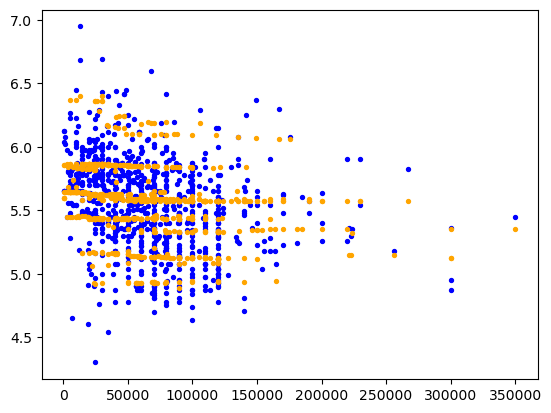

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


#prepping data
df = pd.read_csv('Cars.csv')
X = df.drop(columns=['selling_price', 'name'])
df['selling_price'] = np.log10(df['selling_price'])

#training and testing data
train, test = train_test_split(df, test_size=0.2, random_state=42)
X_train, y_train = train.drop(columns=['selling_price', 'name']), train['selling_price']
X_test, y_test = test.drop(columns=['selling_price', 'name']), test['selling_price']

#model
random_forest = RandomForestRegressor(n_estimators = 100, max_depth = 4, random_state = 0, max_features = 6, n_jobs = -1)
random_forest.fit(X_train, y_train)
y_pred = random_forest.predict(X_test)

#grid search
param_grid = {
    'n_estimators': [100, 150, 200, 250, 300, 350, 400, 450],
    'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],
    'random_state': [0],
    'max_features': [1, 2, 3, 4, 5, 6, 7],
    'n_jobs': [-1]
}

#running + printing grid search
grid = GridSearchCV(estimator = random_forest, param_grid = param_grid, scoring = 'r2')

grid.fit(X_train, y_train)
print("Grid Search Information")
print("Best parameters :", grid.best_params_)
print("Best R2 score : ", grid.best_score_ )

#printing out metrics + visualization
print("Model Information: ")
print("MSE: ", mean_squared_error(y_test, y_pred))
print("Coefficient of determination:", r2_score(y_test, y_pred))

print("Data Comparisons According to Attribute - KM Driven")
plt.scatter(X_test['km_driven'], y_test, s = 8, color='blue')
plt.scatter(X_test['km_driven'], y_pred, s = 8, color='orange')

